In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset

,Starting value,Ending value
0,16000,15081
1,18000,18085
2,20000,19081
3,15086,16000
4,18075,19010


In [4]:
dataset.isnull().sum()

Starting value    0
Ending value      0
dtype: int64

Text(0.5, 1.0, 'money value fluctuations')

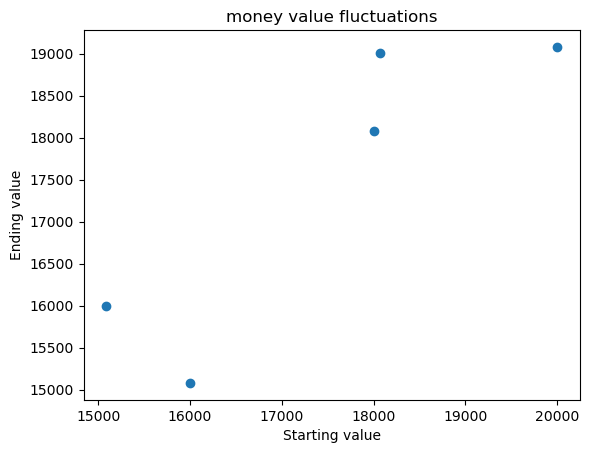

In [5]:
plt.scatter(dataset['Starting value'],dataset['Ending value'])
plt.xlabel('Starting value')
plt.ylabel('Ending value')
plt.title('money value fluctuations')

In [6]:
x = dataset['Starting value']

#x = dataset.drop('Ending value',axis=1)

In [7]:
x

0    16000
1    18000
2    20000
3    15086
4    18075
Name: Starting value, dtype: int64

In [8]:
y = dataset['Ending value']

In [9]:
y

0    15081
1    18085
2    19081
3    16000
4    19010
Name: Ending value, dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression

money_price = LinearRegression()

In [11]:
x.mean()

17432.2

In [12]:
y.mean()

17451.4

Text(0.5, 1.0, 'money value fluctuations')

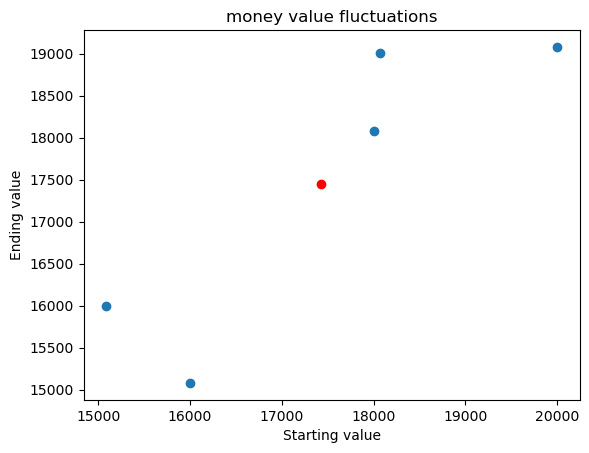

In [13]:
plt.scatter(x.mean(), y.mean(), color = 'red')
plt.scatter(dataset['Starting value'],dataset['Ending value'])
plt.xlabel('Starting value')
plt.ylabel('Ending value')
plt.title('money value fluctuations')

In [14]:
money_price.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [15]:
m = money_price.coef_

In [16]:
c = money_price.intercept_

In [17]:
m*18000 + c

array([17922.35716403])

In [18]:
money_price.predict([[16000]])

array([16263.47317659])

In [19]:
dataset['Predicted_y'] = money_price.predict(x.values.reshape(-1, 1))

In [21]:
dataset

,Starting value,Ending value,Predicted_y
0,16000,15081,16263.473177
1,18000,18085,17922.357164
2,20000,19081,19581.241151
3,15086,16000,15505.363194
4,18075,19010,17984.565314


Text(0.5, 1.0, 'money value fluctuations')

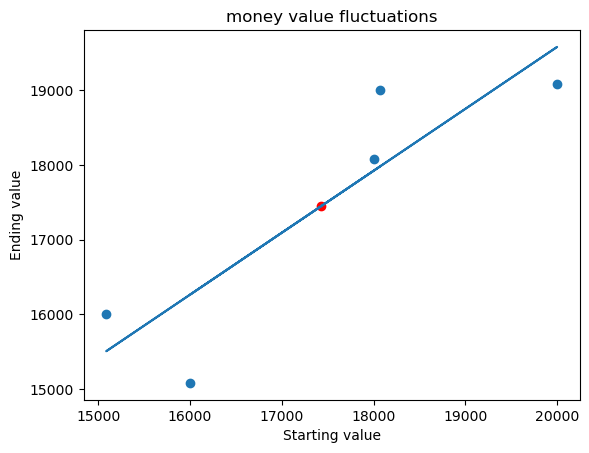

In [23]:
plt.plot(x.values.reshape(-1,1),dataset['Predicted_y'])
plt.scatter(x.mean(), y.mean(), color = 'red')
plt.scatter(dataset['Starting value'],dataset['Ending value'])
plt.xlabel('Starting value')
plt.ylabel('Ending value')
plt.title('money value fluctuations')

***Lose & Cost function***

In [24]:
dataset['Lose'] = dataset['Ending value'] - dataset['Predicted_y']

In [25]:
dataset

,Starting value,Ending value,Predicted_y,Lose
0,16000,15081,16263.473177,-1182.473177
1,18000,18085,17922.357164,162.642836
2,20000,19081,19581.241151,-500.241151
3,15086,16000,15505.363194,494.636806
4,18075,19010,17984.565314,1025.434686


In [26]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [30]:
mse = mean_squared_error(dataset['Ending value'] , dataset['Predicted_y'])
mse

594223.7161502176

In [33]:
mac = mean_absolute_error(dataset['Ending value'], dataset['Predicted_y'])
mac

673.0857312277509

In [34]:
#another way

sum(abs(dataset['Lose']))/ len(x)

673.0857312277509

In [37]:
money_price.score(x.values.reshape(-1,1),y)

0.775113520317445

Text(0.5, 1.0, 'money value fluctuations')

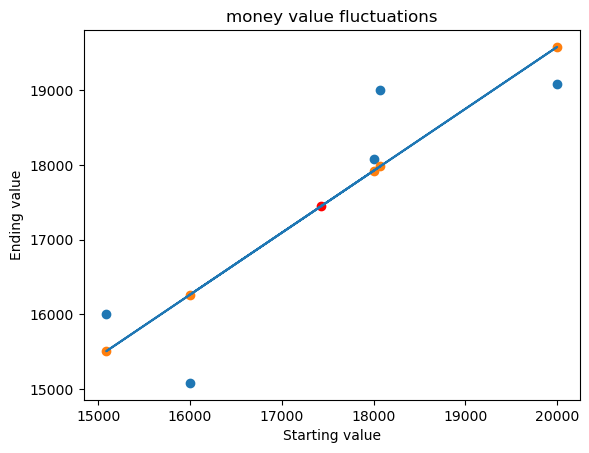

In [40]:
plt.plot(x.values.reshape(-1,1),dataset['Predicted_y'])
plt.scatter(x.mean(), y.mean(), color = 'red')
plt.scatter(dataset['Starting value'],dataset['Ending value'])
plt.scatter(dataset['Starting value'],money_price.predict(x.values.reshape(-1,1)))
plt.xlabel('Starting value')
plt.ylabel('Ending value')
plt.title('money value fluctuations')